In [102]:
import pandas as pd, numpy as np, json, os
import networkx as nx
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
plt.style.use('seaborn-whitegrid')

In [104]:
m=json.loads(open('ignore/member_timelines.json','r').read())

In [105]:
set([i['Csoportok'] for i in m if i['Típus']=='Párt'])

{'⚛️ PP-DD - Partidul Poporului Dan Diaconescu',
 '⚪️ FDSN - Frontul Democrat al Salvarii Nationale',
 '⚪️ FSN - Frontul Salvării Naţionale',
 '✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat',
 '🌷 RMDSZ - Romániai Magyar Demokrata Szövetség',
 '🌹 PDSR - Partidul Democraţiei Sociale din România',
 '🌹 PSD - Partidul Social Democrat',
 '🌹 PSDR - Partidul Socialist Democratic din România',
 '🌹 PSM - Partidul Socialist al Muncii',
 '🍀 FER - Federaţia Ecologistă Română',
 '🍀 MER - Mişcarea Ecologistă din România',
 '🍀 PDAR - Partidul Democrat Agrar din România',
 '🍀 PER - Partidul Ecologist Român',
 '🍏 PMP - Partidul Mişcarea Populară',
 '👤 Independent - Independent',
 '👤 Minorități - Minorități',
 '📐 PAC - Partidul Alianţei Civice',
 "📐 PL'93 - Partidul Liberal",
 '📐 PNL - Partidul Naţional Liberal',
 '📐 PNL-AT - Partidul Naţional Liberal',
 '📐 PNL-CD - Partidul Naţional Liberal',
 '🔘 AUR - Alianţa pentru Unitatea Românilor',
 '🔘 FC - Forţa Civică',
 '🔘 GDC - Gruparea Democratică de

In [1]:
set([i['Csoportok'] for i in m if i['Típus']=='Kamara'])

NameError: name 'm' is not defined

In [133]:
set([i['Csoportok'] for i in m if i['Típus']=='Bizottság'])

{'⏫ Gazdaság, ipar',
 '⏺️ Európa',
 '♿️ Egészségügy',
 '➿ Infrastruktúra, energia, kommunikáció',
 '🅿️ Parlament',
 '🌐 Külpolitika, diaszpóra',
 '🎦 Művészet, média',
 '🏅🅾️ Parlamenti Iroda',
 '🔀 Állami ügyek',
 '🔄 Közigazgatás, környezetvédelem',
 '🔠 Oktatás, tudomány, sport',
 '🔢 Pénzügy',
 '🚩⏫ Gazdaság, ipar',
 '🚩⏺️ Európa',
 '🚩✅ Választások',
 '🚩❎ Más',
 '🚩➿ Infrastruktúra, energia, kommunikáció',
 '🚩🅿️ Parlament',
 '🚩🎦 Művészet, média',
 '🚩💹 Költségvetés',
 '🚩🔀 Állami ügyek',
 '🚩🔄 Közigazgatás, környezetvédelem',
 '🚩🔠 Oktatás, tudomány, sport',
 '🚩🔢 Pénzügy',
 '🚩🚰 Mezőgazdaság, erdők',
 '🚩🚹 Emberi jogok, kisebbségek',
 '🚩🛂 Állambiztonság',
 '🚰 Mezőgazdaság, erdők',
 '🚹 Emberi jogok, kisebbségek',
 '🚻 Munka, szociális és családi ügyek',
 '🛂 Állambiztonság',
 '🛃 Biztonság',
 '🥇🅾️ Parlamenti Iroda',
 '🥈🅾️ Parlamenti Iroda',
 '🥉🅾️ Parlamenti Iroda'}

In [106]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, dic[i])
    return text

In [75]:
medals={'🥈':2,'🥇':3,'🥉':1.5,'🏅':1.25,'🚩':1.5}
medals_none={i:'' for i in medals}

In [111]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        csoport=i['Csoportok']
        csoport=replace_all(csoport,medals_none)
        if csoport not in data[i['Típus']]:data[i['Típus']][csoport]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][csoport]:data[i['Típus']][csoport][st]=set()
            data[i['Típus']][csoport][st].add(name)            
            if name not in attention:attention[name]={}
            if csoport not in attention[name]:attention[name][csoport]={}
            if st not in attention[name][csoport]:attention[name][csoport][st]=[]
            for j in medals:
                if j in i['Csoportok']:
                    attention[name][csoport][st].append(j)

0.0 %
2.9080757262919126 %
5.816151452583825 %
8.724227178875738 %
11.63230290516765 %
14.540378631459564 %
17.448454357751476 %
20.35653008404339 %
23.2646058103353 %
26.172681536627213 %
29.08075726291913 %
31.98883298921104 %
34.89690871550295 %
37.804984441794865 %
40.71306016808678 %
43.62113589437869 %
46.5292116206706 %
49.43728734696251 %
52.345363073254426 %
55.25343879954634 %
58.16151452583826 %
61.06959025213017 %
63.97766597842208 %
66.88574170471398 %
69.7938174310059 %
72.70189315729782 %
75.60996888358973 %
78.51804460988164 %
81.42612033617355 %
84.33419606246547 %
87.24227178875738 %
90.15034751504929 %
93.0584232413412 %
95.96649896763311 %
98.87457469392503 %


In [124]:
m[8]

{'start': '1997-02-01 00:00:00',
 'end': '2000-07-01 00:00:00',
 'Name': 'Ion DUŢU',
 'duration': '1246',
 'Simple': 'Dutu Ion | 1942-10-07',
 'Csoportok': '🇮🇷 Irán',
 'Csoportok0': '🇮🇷 Irán',
 'Csoportok1': '🇮🇷 Irán',
 'Típus': 'Ország',
 'Medals': ''}

In [123]:
set([i['Medals'] for i in m])

{'',
 '🇺🇳 ',
 '🏅',
 '🏅🅾️ Parlamenti Iroda',
 '🏅🇺🇳 ',
 '🚩',
 '🥇',
 '🥇🅾️ Parlamenti Iroda',
 '🥇🇺🇳 ',
 '🥇🚩',
 '🥈',
 '🥈🅾️ Parlamenti Iroda',
 '🥈🇺🇳 ',
 '🥉',
 '🥉🅾️ Parlamenti Iroda'}

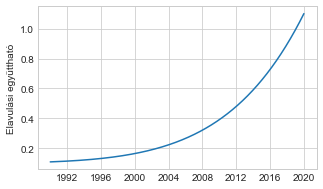

In [77]:
def anneal(t,p=7):
    #pd.to_datetime('2020-01-01')-pd.to_datetime('1989-01-01')=11322
    return (2-(pd.to_datetime('2020-01-01')-pd.to_datetime(t)).days/11322)**p
    
tanneal={}
anneal2020=anneal(pd.to_datetime('2020'))
for t in pd.date_range('1990','2020'):
    tanneal[t]=anneal(t)/anneal2020+0.1
    tanneal[str(t)[:10]]=tanneal[t]
plt.subplots(1,1,figsize=(5,3))
plt.plot(tanneal.keys(),tanneal.values())
plt.ylabel('Elavulási együttható')
plt.show()

In [78]:
edges={}
edges2={}
points={'Ország':1.5,'Bizottság':4,'Párt':2,'Megye':1}
for tipus in data:
    for csoport in data[tipus]:
        print(csoport)
        for t in data[tipus][csoport]:
            names=list(data[tipus][csoport][t])
            for r in range(len(names)):
                name=names[r]
                for p in range(r+1,len(names)):
                    name2=names[p]
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]
                    
                    #symmetric
                    if nset not in edges:edges[nset]={'anneal':0,'values':0}
                    edges[nset]['values']+=v
                    edges[nset]['anneal']+=v*tanneal[t]
                    
                    #asymmetric
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]*attention[name][csoport][t]
                    if nset not in edges2:edges2[nset]={'weight':0}
                    edges2[nset]['weight']+=v*tanneal[t]
                    
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]*attention[name2][csoport][t]
                    nset=tuple(np.sort([name,name2])[::-1])
                    if nset not in edges2:edges2[nset]={'weight':0}
                    edges2[nset]['weight']+=v*tanneal[t]

🇨🇮 Elefántcsontpart
🇮🇷 Irán
Más
🇬🇷 Görögország
🇲🇾 Malajzia
🇧🇬 Bulgária
🇰🇷 Dél-Korea
🇨🇦 Kanada
🇺🇳 🇲🇩 Moldova
🇦🇺 Ausztrália
🇨🇾 Ciprus
🇪🇪 Észtország
🇱🇹 Litvánia
🇮🇹 Olaszország
🇲🇰 Macedónia
🇦🇱 Albánia
🇨🇳 Kína
🇪🇸 Spanyolország
🇫🇷 Franciaország
🇮🇱 Izrael
🇱🇧 Libanon
🇲🇳 Mongólia
🇸🇪 Svédország
🇹🇭 Thaiföld
🇺🇳 Frankofónia
🇻🇪 Venezuela
🇲🇦 Marokkó
🇱🇺 Luxemburg
🇷🇺 Oroszország
🇫🇮 Finnország
🇮🇪 Írország
🇯🇵 Japán
🇧🇷 Brazília
🇨🇺 Kuba
🇭🇷 Horvátország
🇯🇴 Jordánia
🇵🇦 Panama
🇰🇼 Kuvait
🇹🇷 Törökország
🇵🇭 Fülöp-szigetek
🇵🇪 Peru
🇻🇳 Vietnam
🇲🇽 Mexikó
🇦🇿 Azerbajdzsán
🇺🇳 Kelet-Európa
🇺🇳 Fekete tenger
🇪🇨 Ecuador
🇧🇪 Belgium
🇺🇳 Közép-Európa
🇸🇾 Szíria
🇨🇭 Svájc
🇮🇳 India
🇺🇳 Európa Tanács
🇺🇳 Földközi tenger
🇱🇰 Srí Lanka
🇦🇹 Ausztria
🇨🇱 Chile
🇮🇸 Izland
🇧🇴 Bolívia
🇨🇷 Costa Rica
🇨🇿 Czechia
🇸🇮 Szlovénia
🇸🇰 Szlovákia
🇩🇿 Algéria
🇧🇦 Bosznia-Hercegovina
🇱🇻 Lettország
🇵🇹 Portugália
🇦🇲 Örményország
🇧🇭 Bahrein
🇨🇴 Kolumbia
🇬🇧 Egyesült Királyság
🇳🇱 Hollandia
🇳🇴 Norvégia
🇵🇰 Pakisztán
🇭🇺 Magyarország
🇵🇱 Lengyelország
🇩🇪 Németország
🇬🇳 G

Save

In [86]:
import pickle

In [87]:
def save_obj(obj, name ):
    with open('ignore/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('ignore/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [88]:
save_obj(edges,'plotter_name_edges')

In [82]:
#edges=load_obj('plotter_name_edges')

Weighted

In [100]:
edges2l=[(i[0],i[1],edges2[i]) for i in edges2]
G = nx.DiGraph()
G.add_edges_from(edges2l)
nodes={}

r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]={'pr':r[i]/mr}
    
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z

In [101]:
#save 
network={'nodes':nodes,'links':links,'size':len(edges2l)}
print(len(nodes),'nodes and',len(G.edges()),'edges')
open('ignore/plotter_name_weighted.json','w').write(json.dumps(network))
import zipfile

with zipfile.ZipFile("json/plotter_name_weighted.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name_weighted.json",'plotter_name_weighted.json')

2818 nodes and 1227316 edges


Prune

In [97]:
min_t=365*4*10
edges2l=[(i[0],i[1],edges2[i]) for i in edges2 if edges2[i]['weight']>min_t]
G = nx.DiGraph()
G.add_edges_from(edges2l)
nodes={}

r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]={'pr':r[i]/mr}
    
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z

In [99]:
#save 
network={'nodes':nodes,'links':links,'size':len(edges2l)}
print(len(nodes),'nodes and',len(G.edges()),'edges')
open('ignore/plotter_name_weighted_pruned.json','w').write(json.dumps(network))
import zipfile

with zipfile.ZipFile("json/plotter_name_weighted_pruned.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name_weighted_pruned.json",'plotter_name_weighted_pruned.json')

451 nodes and 4984 edges
